# Exploratory Data Analysis

#### Import libraries

In [85]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

%matplotlib inline

#### Import datasets 

In [69]:
df_branchesBI = pd.read_csv("./Data/branchesBI.csv")
df_contactBI = pd.read_csv("./Data/contacCenterBI.csv")
df_digital_channelBI = pd.read_csv("./Data/digitalChannelBI.csv")
df_b2bBI = pd.read_csv("./Data/b2bBI.csv")
df_credit_cardBI = pd.read_csv("./Data/creditCardBI.csv")

The Objective of this EDA section applied to the ScotiaBank Assessment is determine patterns and relationship between variablee in each dataset.

### 1. Branches

In [76]:
# Give a grance to the dataset
df_branchesBI.head(2)

,segment,answerDate,NPS,impactInteraction,reason,improvement
0,1,1,0,3,Porque el banco no respalda a sus clientes y t...,Es un banco ineficiente
1,1,2,5,2,No sé soluciono el problema,Más oficinas


In [77]:
# Filter the information in braches
df_branches_cut = df_branchesBI[['segment', 'answerDate', 'NPS', 'impactInteraction']]
df_branches_cut.head(2)

,segment,answerDate,NPS,impactInteraction
0,1,1,0,3
1,1,2,5,2


In [78]:
# Describe the variables that I select to perform de EDA
df_branches_cut.describe()

,segment,answerDate,NPS,impactInteraction
count,993.000000,993.000000,993.000000,993.000000
mean,1.233635,2.000000,8.123867,4.095670
std,0.451025,0.816908,3.010694,1.280244
min,1.000000,1.000000,0.000000,1.000000
25%,1.000000,1.000000,8.000000,3.000000
50%,1.000000,2.000000,10.000000,5.000000
75%,1.000000,3.000000,10.000000,5.000000
max,3.000000,3.000000,10.000000,5.000000


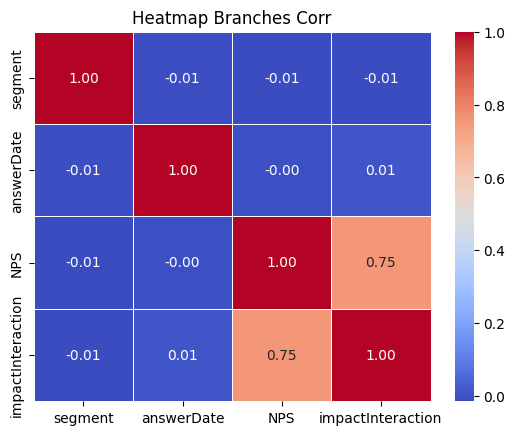

In [79]:
# Here we found the correlation heatmap to express the relationship between the selected variables
correlation_branches_cut = df_branches_cut.corr()
sns.heatmap(correlation_branches_cut, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Heatmap Branches Corr")
plt.show()

The NPS variable is possitive related to impact interaction in 0.75.

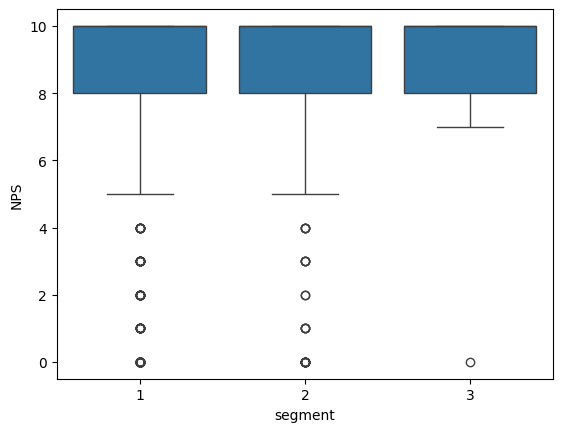

In [22]:
sns.boxplot(x='segment', y='NPS', data=df_branches_cut)
plt.show()

The NPS distributed by segment has a similar distribution with an exception in segment number three that has less outliers in lower NPS evaluation. 

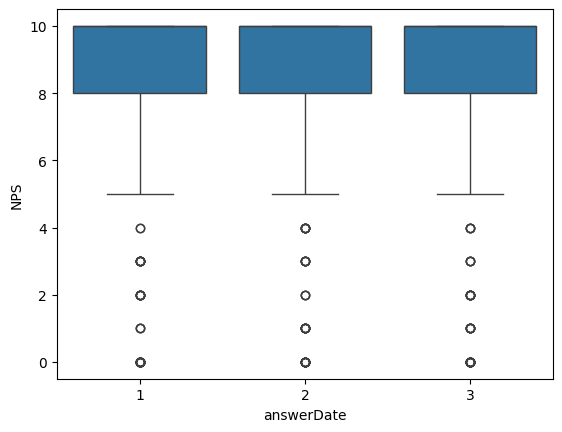

In [20]:
sns.boxplot(x='answerDate', y='NPS', data=df_branches_cut)
plt.show()

The boxplot shows the information and distribution of answerDate variable in relation with NPS evaluation, that distribution of information seems to be similarly. 

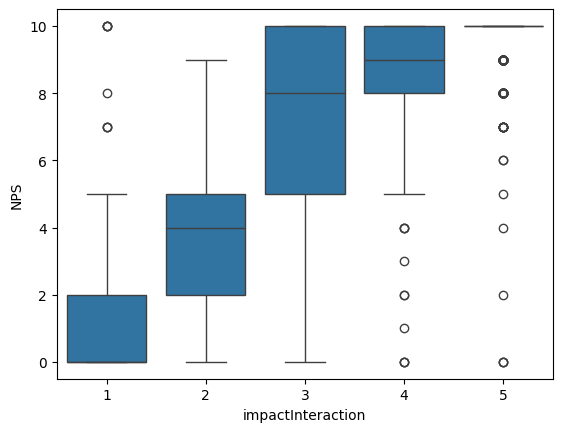

In [21]:
sns.boxplot(x='impactInteraction', y='NPS', data=df_branches_cut)
plt.show()

In this case, the information has a distribution that is positive related with NPS, here the impact interaction increase meanwhile the NPS increase.

### 2. Contac Center

In [29]:

df_contac_cut =  df_contactBI[['segment', 'answerDate', 'NPS', 'impactInteraction']]


In [30]:
df_contac_cut.head(2)

,segment,answerDate,NPS,impactInteraction
0,1,2,0,5
1,1,3,3,1


In [31]:
df_contac_cut.describe()

,segment,answerDate,NPS,impactInteraction
count,997.000000,997.000000,997.000000,997.000000
mean,1.234704,2.004012,6.904714,3.391174
std,0.466852,0.814024,3.735474,1.564363
min,1.000000,1.000000,0.000000,1.000000
25%,1.000000,1.000000,4.000000,2.000000
50%,1.000000,2.000000,9.000000,4.000000
75%,1.000000,3.000000,10.000000,5.000000
max,3.000000,3.000000,10.000000,5.000000


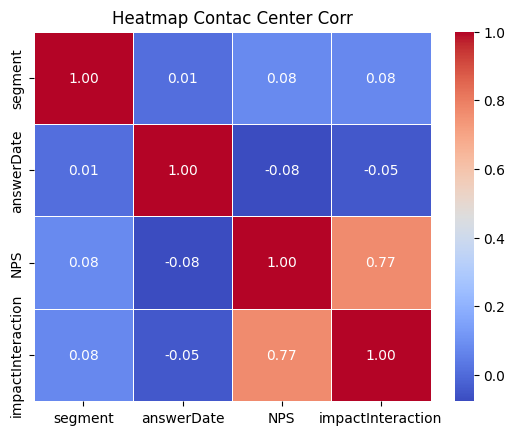

In [33]:
correlation_contac_cut = df_contac_cut.corr()
sns.heatmap(correlation_contac_cut, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Heatmap Contac Center Corr")
plt.show()

As the above section in branches, here in contact center the variable that has a better positive relationship with NPS is impact interaction.

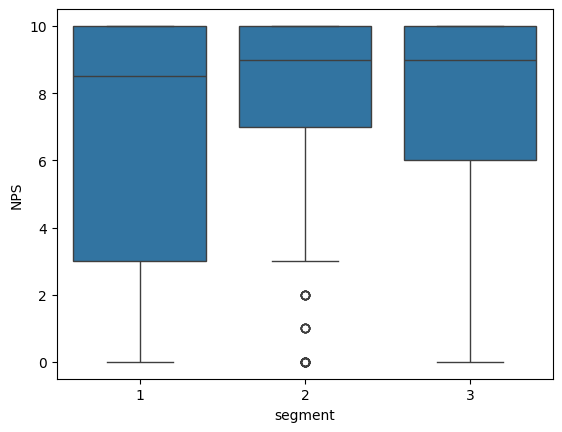

In [34]:
sns.boxplot(x='segment', y='NPS', data=df_contac_cut)
plt.show()

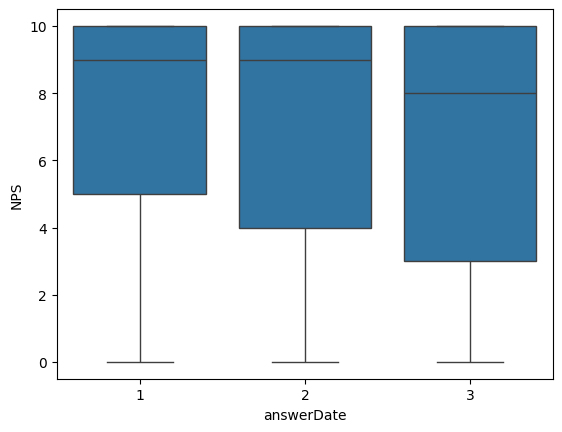

In [36]:
sns.boxplot(x='answerDate', y='NPS', data=df_contac_cut)
plt.show()

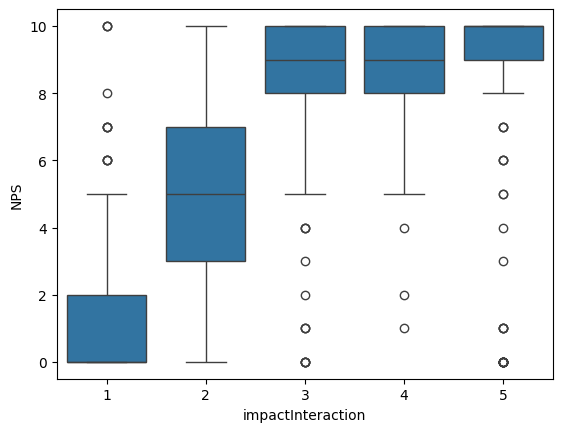

In [37]:
sns.boxplot(x='impactInteraction', y='NPS', data=df_contac_cut)
plt.show()

The positive relationship betweem NPS and impact interaction shows that meanwhile NPS increase impact interaction increase.

### 3. Digital Channel

In [39]:
df_digital_cut = df_digital_channelBI[['segment', 'answerDate', 'NPS', 'impactInteraction']]

In [40]:
df_digital_cut.head(2)

,segment,answerDate,NPS,impactInteraction
0,2,1,0,3
1,1,2,4,2


In [41]:
df_digital_cut.describe()

,segment,answerDate,NPS,impactInteraction
count,993.000000,993.000000,993.000000,993.000000
mean,1.433031,2.002014,8.448137,3.820745
std,0.558834,0.816906,2.644147,1.189713
min,1.000000,1.000000,0.000000,1.000000
25%,1.000000,1.000000,8.000000,3.000000
50%,1.000000,2.000000,10.000000,4.000000
75%,2.000000,3.000000,10.000000,5.000000
max,3.000000,3.000000,10.000000,5.000000


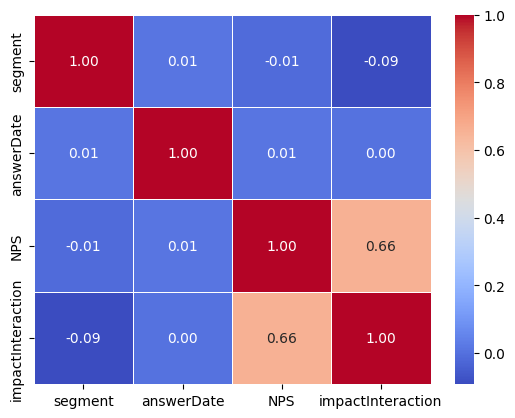

In [42]:
df_digital_corr = df_digital_cut.corr()
sns.heatmap(df_digital_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()

Here in Digital Channel analysis, the positive relationship between NPS and impact interation is lower.

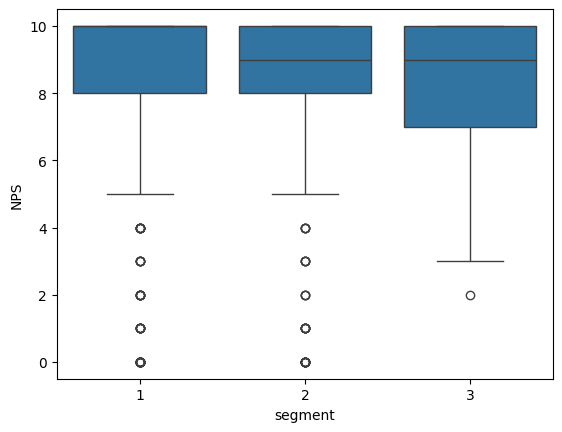

In [43]:
sns.boxplot(x='segment', y='NPS', data=df_digital_cut)
plt.show()

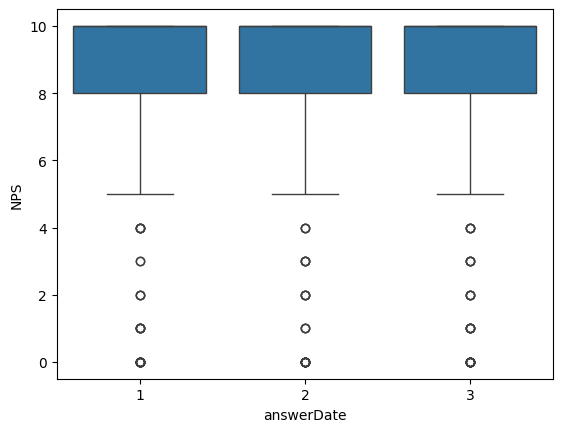

In [44]:
sns.boxplot(x='answerDate', y='NPS', data=df_digital_cut)
plt.show()

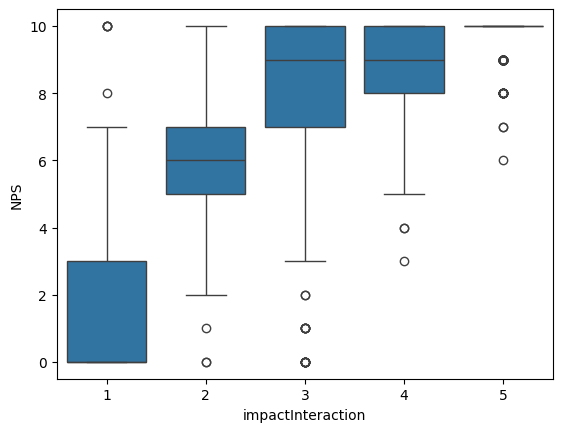

In [45]:
sns.boxplot(x='impactInteraction', y='NPS', data=df_digital_cut)
plt.show()

### 4. B2B

In [47]:
df_b2b_cut = df_b2bBI[['answerDate', 'surveyType', 'NPS_BSC', 'impactInteraction',
                       'NPS_Coverage_Team', 'impactLastInteraction','Nps_rel']]

In [51]:
df_b2b_cut.describe()

,answerDate,surveyType,NPS_BSC,impactInteraction,NPS_Coverage_Team,impactLastInteraction,Nps_rel
count,925.000000,925.000000,395.000000,395.000000,72.000000,72.000000,458.000000
mean,2.305946,1.582703,7.820253,3.678481,8.652778,3.888889,8.480349
std,0.716546,0.631876,3.159964,1.321596,2.283805,1.205101,2.284149
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2.000000,1.000000,7.000000,3.000000,8.000000,3.000000,8.000000
50%,2.000000,2.000000,9.000000,4.000000,10.000000,4.000000,9.000000
75%,3.000000,2.000000,10.000000,5.000000,10.000000,5.000000,10.000000
max,3.000000,3.000000,10.000000,5.000000,10.000000,5.000000,10.000000


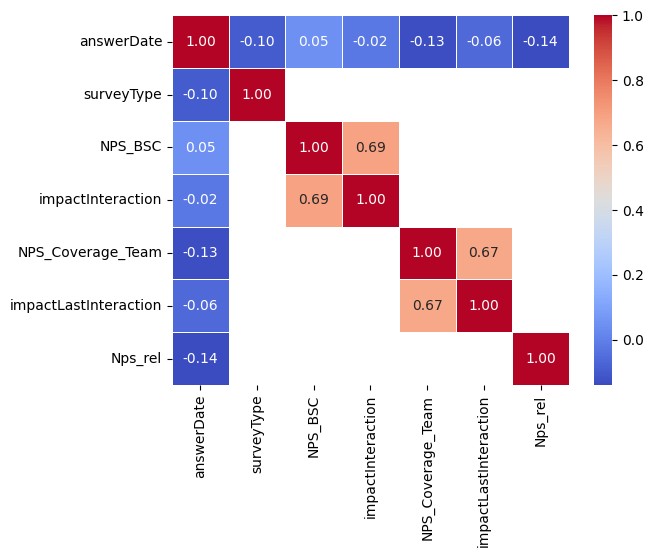

In [50]:
df_b2b_corr = df_b2b_cut.corr()
sns.heatmap(df_b2b_corr, cmap='coolwarm', annot=True, linewidths=0.5, fmt=".2f")
plt.show()

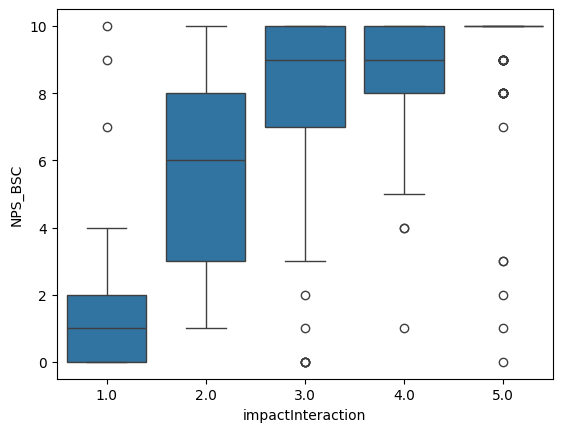

In [53]:
sns.boxplot(x='impactInteraction', y='NPS_BSC', data = df_b2b_cut)
plt.show()

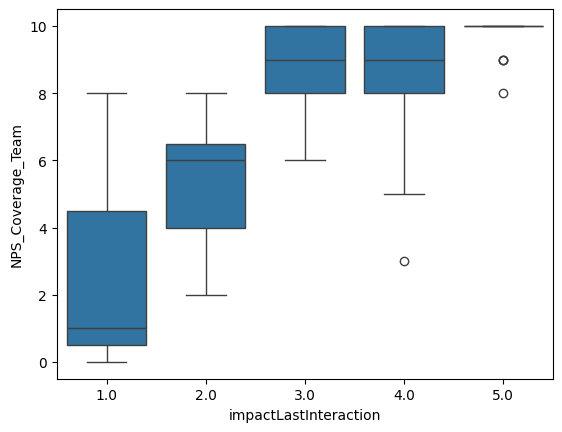

In [56]:
sns.boxplot(x='impactLastInteraction', y='NPS_Coverage_Team', data = df_b2b_cut)
plt.show()

In both cases, the impact interaction and impact of last interaction has a positive relationship with NPS BSC and NPS Coverage Team.

### 5. Credit Card

In [70]:
df_credit_cut =df_credit_cardBI[['propName', 'segment', 'interactionDate', 'NPS']]

In [71]:
df_branches_cut.head(2)

,segment,answerDate,NPS,impactInteraction
0,1,1,0,3
1,1,2,5,2


In [72]:
df_credit_cut.describe()

,propName,segment,interactionDate,NPS
count,1001.000000,1001.000000,1001.000000,1001.000000
mean,0.825175,1.283716,1.999001,8.007992
std,0.380007,0.541687,0.816700,2.999989
min,0.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,8.000000
50%,1.000000,1.000000,2.000000,9.000000
75%,1.000000,2.000000,3.000000,10.000000
max,1.000000,4.000000,3.000000,10.000000


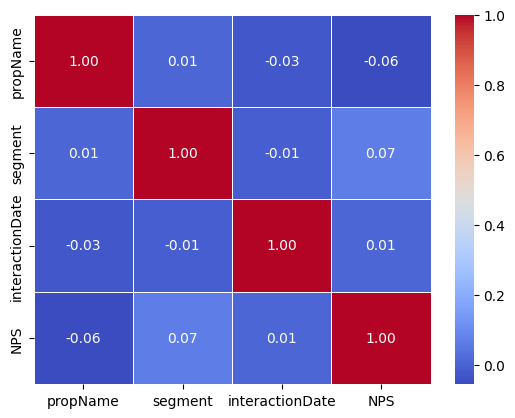

In [74]:
df_credit_corr = df_credit_cut.corr()
sns.heatmap(df_credit_corr, cmap='coolwarm', annot=True, linewidths=0.5, fmt='.2f')
plt.show()

In case of Credit Card, le relationship between variables is weak.

### Model development

To perform a model deveopment in this assessment of Scotiabank I will use the variables that had a positive relationship, impact interaction as independent variable and NPS as the target variable. 

#### Linear Regression

In [83]:
X = df_branchesBI.impactInteraction.astype(float)
X_reshaped = X.values.reshape(-1, 1)
Y = df_branchesBI.NPS.astype(float)
lm = LinearRegression()

lm.fit(X_reshaped,Y)
print('R^2: ',lm.score(X_reshaped, Y))

R^2:  0.5642836092957255


The R^2 score is lower, in this case the positive relationship between variables do not perform a good fit.

### Model evaluation and refinemetn

In [86]:
x_train, x_test, y_train, y_test = train_test_split(X_reshaped, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 149
number of training samples: 844


In [87]:
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train,y_train)
test_score,train_score = RidgeModel.score(x_test,y_test),RidgeModel.score(x_train,y_train)
print("R^2 test: ", test_score)

R^2 test:  0.43056895427175534


The result after the model refinement is lower than previous process of model evaluation.